In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import requests
import io
from sklearn.decomposition import PCA

In [19]:
#import BRCA dataset from Kaggle
url = 'https://raw.githubusercontent.com/chanananins/BRCA-PCA/main/brca_data_w_subtypes.csv' 
    
# Make sure the url is the raw version of the file on GitHub 
download = requests.get(url).content
brca_data =  pd.read_csv(io.StringIO(download.decode('utf-8')))

#import from my desktop (can # out and use ^)
#brca_data = pd.read_csv('/Users/chloeyachanin/Desktop/brca_data_w_subtypes.csv')

#clean up dataset for PCA
#identifying where string values present in dataset
string_columns = brca_data.select_dtypes(include=['object']).columns.tolist()
print(string_columns)
#print(dataset[['PR.Status', 'ER.Status', 'HER2.Final.Status', 'histological.type']])

brca_data = brca_data.fillna(0)
#changing values in string dataset to numeric values
value_map = {'Positive': 1, 'Negative': 2, 'infiltrating ductal carcinoma': 3, 'infiltrating lobular carcinoma': 4, 'Performed but Not Available':0, 'Not Performed':0, 'Equivocal': 5, 'Indeterminate':6, 'Not Available':0, None: 0}

check_columns = ['PR.Status', 'ER.Status', 'HER2.Final.Status', 'histological.type']  # list of string column names

string_value = 'Negative'

for index, row in brca_data.iterrows():
    for string_column in check_columns:
        if row[string_column] in value_map:
            brca_data.at[index, string_column] = value_map[row[string_column]]
       
#print(brca_data[['PR.Status', 'ER.Status', 'HER2.Final.Status', 'histological.type']]) 

#save new dataset
#dataset.to_csv('/Users/chloeyachanin/Desktop/modified_brca_data_w_subtypes.csv', index=False)


['PR.Status', 'ER.Status', 'HER2.Final.Status', 'histological.type']


In [20]:
#import modified dataset
url = 'https://raw.githubusercontent.com/chanananins/BRCA-PCA/main/modified_brca_data_w_subtypes.csv' 
    
# Make sure the url is the raw version of the file on GitHub
download = requests.get(url).content

brca_data_modified =  pd.read_csv(io.StringIO(download.decode('utf-8')))

#import from my desktop (can # out and use ^)
#brca_data_modified = pd.read_csv('/Users/chloeyachanin/Desktop/modified_brca_data_w_subtypes.csv')



[0.08144044 0.06107846 0.03168938 0.02893171 0.02393236 0.02022062
 0.01958439 0.01877825 0.01773981 0.01666044 0.016176   0.01580464
 0.01432871 0.01364557 0.01222762 0.0117395  0.01144049 0.01098194
 0.01035046 0.01000633 0.00945832 0.0087054  0.00844711 0.00812972
 0.00796548 0.00774307 0.00723168 0.00707057 0.00697544 0.00672409
 0.00662998 0.00642343 0.00594083 0.00580139 0.00564451 0.00547344
 0.00517329 0.00505133 0.00488573 0.00465757 0.00451347 0.00438254
 0.00418587 0.00410264 0.00406967 0.00396702 0.00392922 0.00379614
 0.00371455 0.00358654 0.00352056 0.00350968 0.00343256 0.00342582
 0.00332727 0.00331422 0.00325559 0.00313015 0.0031104  0.00301049
 0.00298201 0.00292374 0.00288796 0.00285105 0.0027171  0.00269771
 0.00268044 0.00264849 0.00258949 0.00255796 0.00253672 0.00247804
 0.00247165 0.00245184 0.00240114 0.0023615  0.00235003 0.00232403
 0.00230137 0.00227387 0.00223417 0.00221193 0.00218041 0.0021368
 0.00209998 0.00208267 0.00207217 0.00204227 0.00203528 0.00201

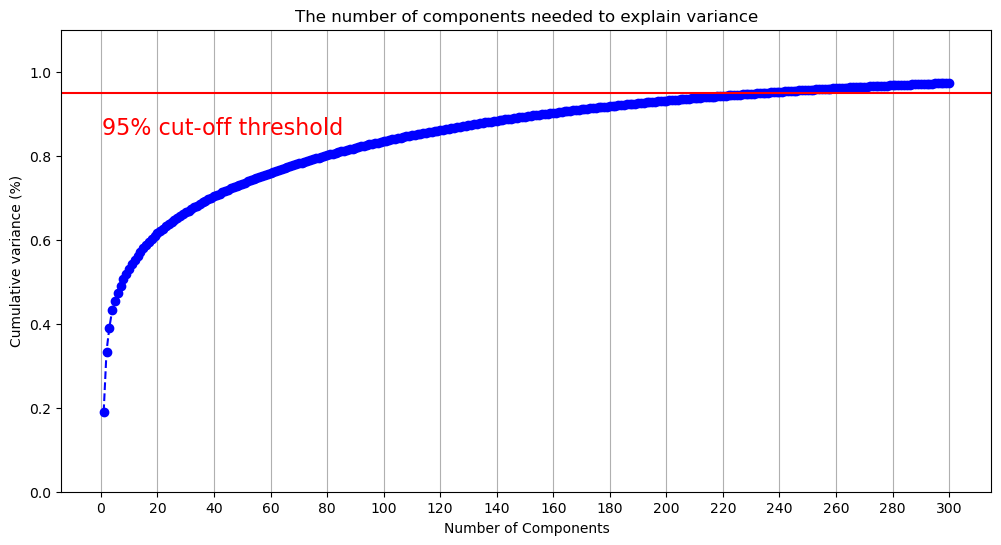

In [21]:
#perform PCA on data

#distribute data into two components X and Y
X = brca_data_modified.iloc[:, 0:1940].values
y = brca_data_modified.iloc[:, 1940].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#normalize data
sc = StandardScaler()
  
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.decomposition import PCA
  
pca = PCA(n_components = 0.95)
  
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
  
explained_variance = pca.explained_variance_ratio_

print(explained_variance)
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

pca = PCA().fit(brca_data_modified.iloc[:, 0:604])


plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1,301)
y = np.cumsum(pca.explained_variance_ratio_)[:300]

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 301, step=20)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [70]:
#Column with infiltrating ductal carcinoma or infiltrating lobular carcinoma
cancer_type = brca_data_modified.iloc[:, 1940]

# Perform PCA on gene expression (rs)
pca_rs = PCA(n_components=0.95)
rs_pca = pca_rs.fit_transform(brca_data_modified.iloc[:, 0:604])

# Perform PCA on copy number variation (cn)
pca_cn = PCA(n_components=0.95)
cn_pca = pca_cn.fit_transform(brca_data_modified.iloc[:, 604:1464])

# Perform PCA on mutations (mu)
pca_mu = PCA(n_components=0.95)
mu_pca = pca_mu.fit_transform(brca_data_modified.iloc[:, 1464:1713])

# Perform PCA on protein levels (pp)
pca_pp = PCA(n_components=0.95)
pp_pca = pca_pp.fit_transform(brca_data_modified.iloc[:, 1713:1936])

In [71]:
#combine PCA results into one dataset
combined_pca_data = pd.DataFrame(data = {'cn_pc1': cn_pca[:,0], 'cn_pc2': cn_pca[:,1],
                                'mu_pc1': mu_pca[:,0], 'mu_pc2': mu_pca[:,1],
                                'rs_pc1': rs_pca[:,0], 'rs_pc2': rs_pca[:,1],
                                'pp_pc1': pp_pca[:,0], 'pp_pc2': pp_pca[:,1],
                                'cancer_type': cancer_type})


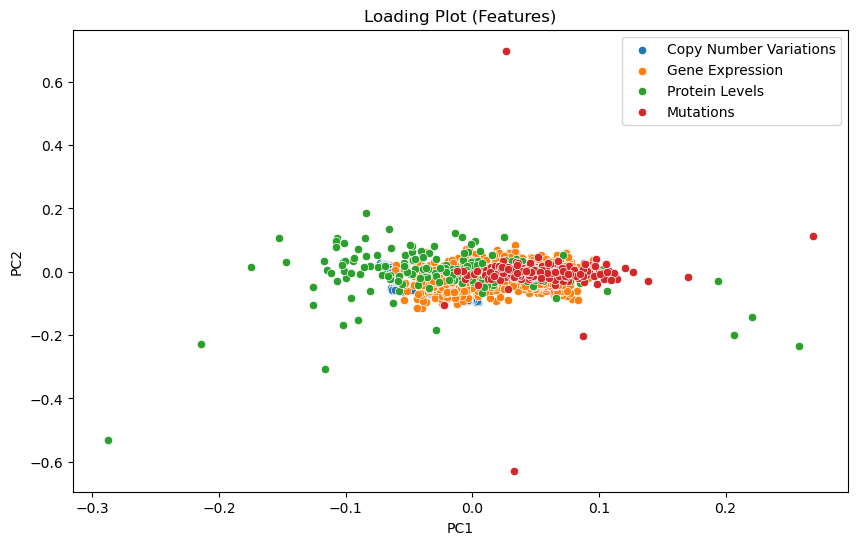

In [72]:
# Create the loading plot
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_cn.components_[0], y=pca_cn.components_[1], label='Copy Number Variations')
sns.scatterplot(x=pca_rs.components_[0], y=pca_rs.components_[1], label='Gene Expression')
sns.scatterplot(x=pca_pp.components_[0], y=pca_pp.components_[1], label='Protein Levels')
sns.scatterplot(x=pca_mu.components_[0], y=pca_mu.components_[1], label='Mutations')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.title('Loading Plot (Features)')
plt.show()

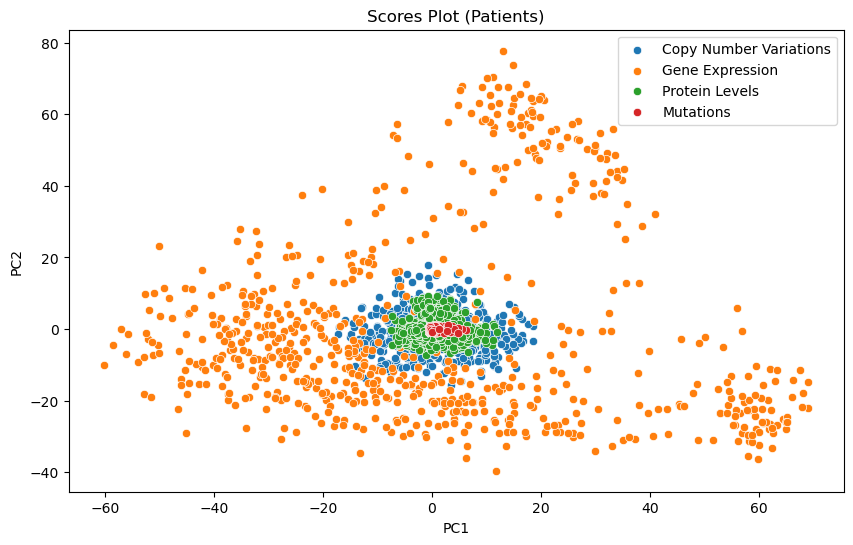

In [73]:
# Create the scores plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=combined_pca_data['cn_pc1'], y=combined_pca_data['cn_pc2'], label='Copy Number Variations')
sns.scatterplot(x=combined_pca_data['rs_pc1'], y=combined_pca_data['rs_pc2'], label='Gene Expression')
sns.scatterplot(x=combined_pca_data['pp_pc1'], y=combined_pca_data['pp_pc2'], label='Protein Levels')
sns.scatterplot(x=combined_pca_data['mu_pc1'], y=combined_pca_data['mu_pc2'], label='Mutations')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scores Plot (Patients)')
plt.show()

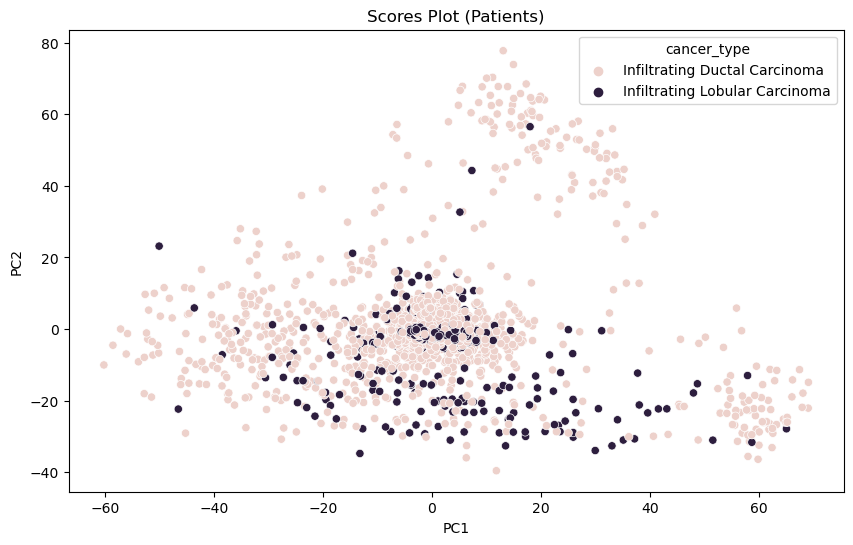

In [74]:
plt.figure(figsize=(10, 6))
change_label = sns.scatterplot(x=combined_pca_data['cn_pc1'], y=combined_pca_data['cn_pc2'], hue=combined_pca_data['cancer_type'])
labels = change_label.get_legend().get_texts()
labels[0].set_text('Infiltrating Ductal Carcinoma')
labels[1].set_text('Infiltrating Lobular Carcinoma')


sns.scatterplot(x=combined_pca_data['mu_pc1'], y=combined_pca_data['mu_pc2'], hue=combined_pca_data['cancer_type'], legend=False)
sns.scatterplot(x=combined_pca_data['rs_pc1'], y=combined_pca_data['rs_pc2'], hue=combined_pca_data['cancer_type'], legend=False)
sns.scatterplot(x=combined_pca_data['pp_pc1'], y=combined_pca_data['pp_pc2'], hue=combined_pca_data['cancer_type'], legend=False)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scores Plot (Patients)')
plt.show()

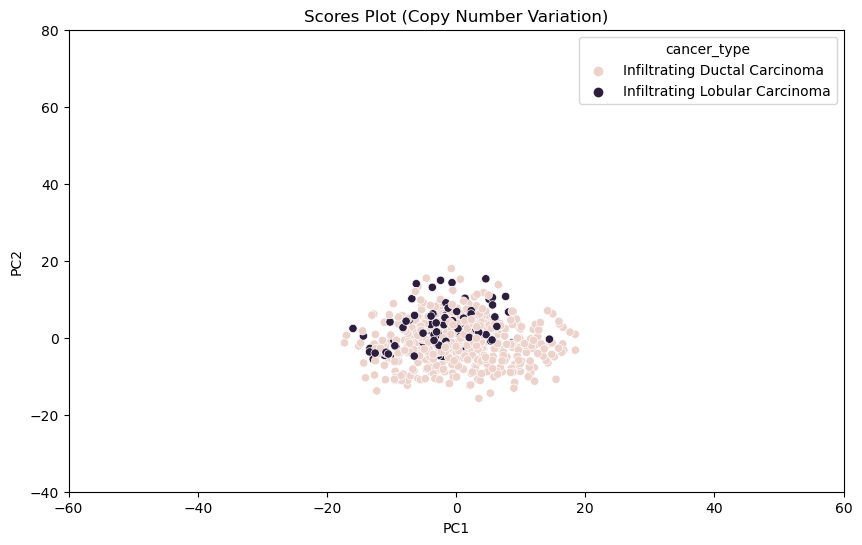

In [75]:
#separate plots
plt.figure(figsize=(10, 6))
change_label = sns.scatterplot(x=combined_pca_data['cn_pc1'], y=combined_pca_data['cn_pc2'], hue=combined_pca_data['cancer_type'])
labels = change_label.get_legend().get_texts()
labels[0].set_text('Infiltrating Ductal Carcinoma')
labels[1].set_text('Infiltrating Lobular Carcinoma')


plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scores Plot (Copy Number Variation)')
plt.xlim(-60, 60)
plt.ylim(-40, 80)
plt.show()

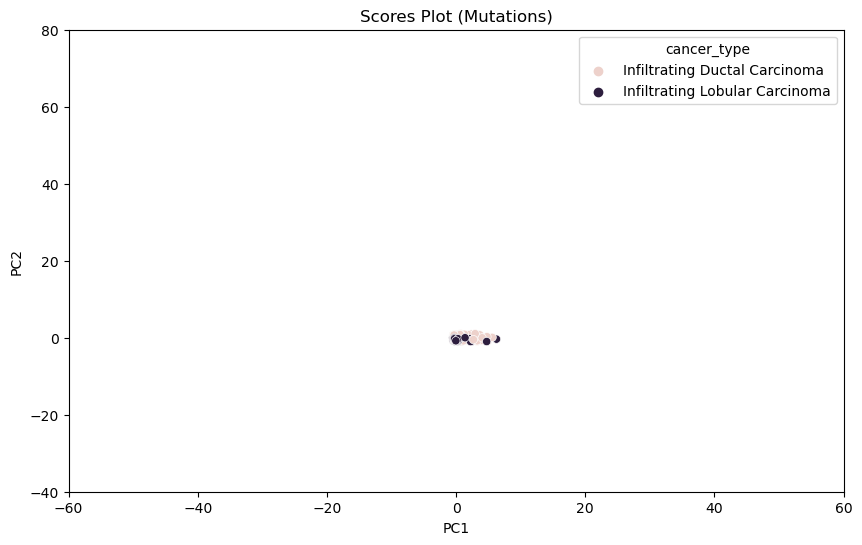

In [76]:
plt.figure(figsize=(10, 6))
change_label = sns.scatterplot(x=combined_pca_data['mu_pc1'], y=combined_pca_data['mu_pc2'], hue=combined_pca_data['cancer_type'])
labels = change_label.get_legend().get_texts()
labels[0].set_text('Infiltrating Ductal Carcinoma')
labels[1].set_text('Infiltrating Lobular Carcinoma')


plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scores Plot (Mutations)')
plt.xlim(-60, 60)
plt.ylim(-40, 80)
plt.show()

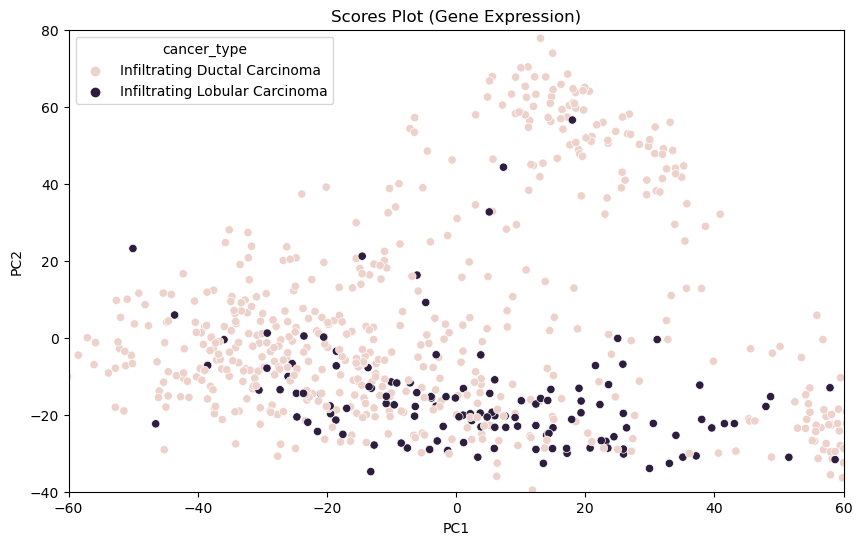

In [77]:
plt.figure(figsize=(10, 6))
change_label = sns.scatterplot(x=combined_pca_data['rs_pc1'], y=combined_pca_data['rs_pc2'], hue=combined_pca_data['cancer_type'])
labels = change_label.get_legend().get_texts()
labels[0].set_text('Infiltrating Ductal Carcinoma')
labels[1].set_text('Infiltrating Lobular Carcinoma')


plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scores Plot (Gene Expression)')
plt.xlim(-60, 60)
plt.ylim(-40, 80)
plt.show()

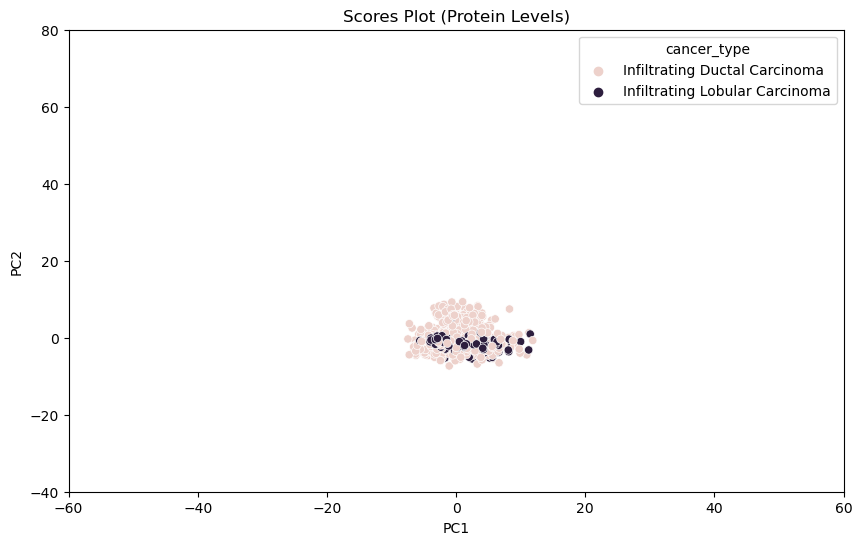

In [78]:
plt.figure(figsize=(10, 6))
change_label = sns.scatterplot(x=combined_pca_data['pp_pc1'], y=combined_pca_data['pp_pc2'], hue=combined_pca_data['cancer_type'])
labels = change_label.get_legend().get_texts()
labels[0].set_text('Infiltrating Ductal Carcinoma')
labels[1].set_text('Infiltrating Lobular Carcinoma')


plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scores Plot (Protein Levels)')
plt.xlim(-60, 60)
plt.ylim(-40, 80)
plt.show()